In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import pandas as pd
from pathlib import Path

In [3]:
path = Path('.') / 'MIRI/WISE1738_310723.txt'

spec= pd.DataFrame()
spec = pd.read_csv(path, header=0, delimiter = ',')

In [30]:
# np.where(spec['error[Jy]'] == min(spec['error[Jy]'])), np.where(spec['error[Jy]'] == max(spec['error[Jy]']))

In [31]:
# spec['flux[Jy]'][2656], spec['flux[Jy]'][2282], spec['error[Jy]'][2656], spec['error[Jy]'][2282]

In [58]:
## min and max measured flux variation due to noise (in flux percentages)
specf= spec['flux[Jy]'] >0 
np.where(spec['error[Jy]'][specf]/spec['flux[Jy]'][specf] == min(spec['error[Jy]'][specf]/spec['flux[Jy]'][specf])), np.where(spec['error[Jy]'][specf]/spec['flux[Jy]'][specf] == max(spec['error[Jy]'][specf]/spec['flux[Jy]'][specf]))

((array([4999]),), (array([3281]),))

In [77]:
np.where(spec['error[Jy]']/abs(spec['flux[Jy]']) == min(spec['error[Jy]']/abs(spec['flux[Jy]']))), np.where(spec['error[Jy]']/abs(spec['flux[Jy]']) == max(spec['error[Jy]']/abs(spec['flux[Jy]'])))

((array([5878]),), (array([4142]),))

In [79]:
spec['error[Jy]'][4999]/spec['flux[Jy]'][4999], spec['error[Jy]'][5878]/spec['flux[Jy]'][5878]

(0.06378864906751101, 0.022982049441240018)

In [78]:
spec['error[Jy]'][3281]/ spec['flux[Jy]'][3281], spec['error[Jy]'][4142]/spec['flux[Jy]'][4142]

(0.2830370828273964, 751.7943970958318)

In [65]:
## the percentage of flux variation (in units of measured flux) due to the quoted noise is 6-28% 

In [66]:
## increase in the error on the flux measurement when 10**-9 is added is 12-55%. thtas an increase of 6-27%
np.sqrt(spec['error[Jy]'][4999]**2+ 10**-9)/ spec['flux[Jy]'][4999], np.sqrt(spec['error[Jy]'][3281]**2+ 10**-9)/ spec['flux[Jy]'][3281]

(0.12010430328027098, 0.554315440812668)

In [68]:
## increase in the error on the flux measurement when 10**-15 is added is 6-28%. thtas an increase of %1e-7%
np.sqrt(spec['error[Jy]'][4999]**2+ 10**-15)/ spec['flux[Jy]'][4999], np.sqrt(spec['error[Jy]'][3281]**2+ 10**-15)/ spec['flux[Jy]'][3281]

(0.063788730242183, 0.2830374841095436)

In [69]:
0.063788730242183 - 0.06378864906751101, 0.2830374841095436 - 0.2830370828273964

(8.117467198420769e-08, 4.0128214717771726e-07)

In [70]:
## increase in the error on the flux measurement when 10**-7 is added is 101-477%. thtas an increase of 95-450%
np.sqrt(spec['error[Jy]'][4999]**2+ 10**-7)/ spec['flux[Jy]'][4999], np.sqrt(spec['error[Jy]'][3281]**2+ 10**-7)/ spec['flux[Jy]'][3281]

(1.0196441454782064, 4.774481307644365)

In [71]:
1.0196441454782064 - 0.06378864906751101, 4.774481307644365 - 0.2830370828273964

(0.9558554964106953, 4.491444224816968)

In [72]:
# ## increase in the error on the flux measurement when 10**-9 is added. 
# 0.000024/0.000154, 0.000077/0.000339, np.sqrt(0.000024**2+ 10**-9)/0.000154 , np.sqrt(0.000077**2+ 10**-9)/0.000339

In [73]:
# ## how much more noise in percentage of the flux is the prior range bm offering? 

# np.sqrt(0.000024**2+ 10**-15)/0.000154 , np.sqrt(0.000077**2+ 10**-15)/0.000339

In [74]:
# 0.15584429112548243 - 0.15584415584415584 , 0.22713866222273224 -  0.22713864306784662

In [75]:
# np.sqrt(0.000024**2+ 10**-7)/0.000154 , np.sqrt(0.000077**2+ 10**-7)/0.000339

In [76]:
# 2.0593324304327063 - 0.25778484728934037, 0.9600806969735108 - 0.24554753712869334

In [ ]:
## lower range - low wave it is offering 1e-5% and high wav offering 2e-6%
## upper range - low wave it is offering 180 % and high wav offering 71%

((array([3268]),), (array([5629]),))

(-0.0002706673188638, 0.0008046304600403)

In [3]:
spec

,wavelength[um],flux[Jy],error[Jy],Band
0,4.900400,0.000154,0.000024,1A
1,4.901201,0.000214,0.000024,1A
2,4.902002,0.000223,0.000023,1A
3,4.902802,0.000326,0.000027,1A
4,4.903603,0.000493,0.000029,1A
...,...,...,...,...
9741,17.971240,0.000196,0.000054,3C
9742,17.973742,0.000357,0.000053,3C
9743,17.976245,0.000278,0.000056,3C
9744,17.978747,0.000053,0.000056,3C


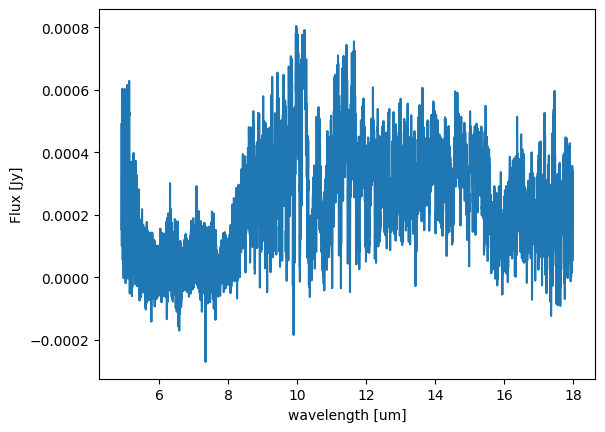

In [4]:
plt.plot(spec.iloc[:,0], spec.iloc[:,1])
plt.ylabel('Flux [Jy]')
plt.xlabel('wavelength [um]')
plt.show()

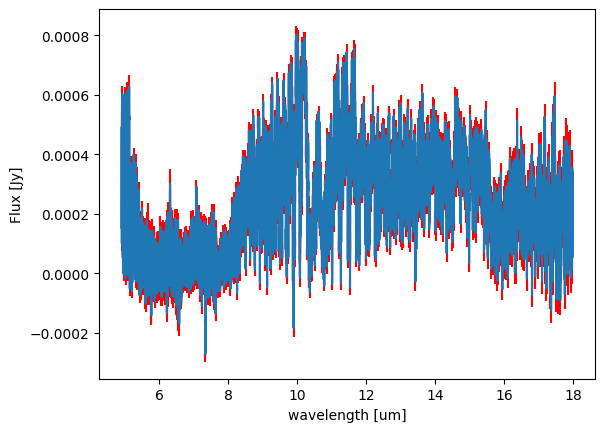

In [5]:
plt.errorbar(spec.iloc[:,0], spec.iloc[:,1], spec.iloc[:,2], ecolor= 'red')
plt.ylabel('Flux [Jy]')
plt.xlabel('wavelength [um]')
plt.show()

## Checking for channel overlap

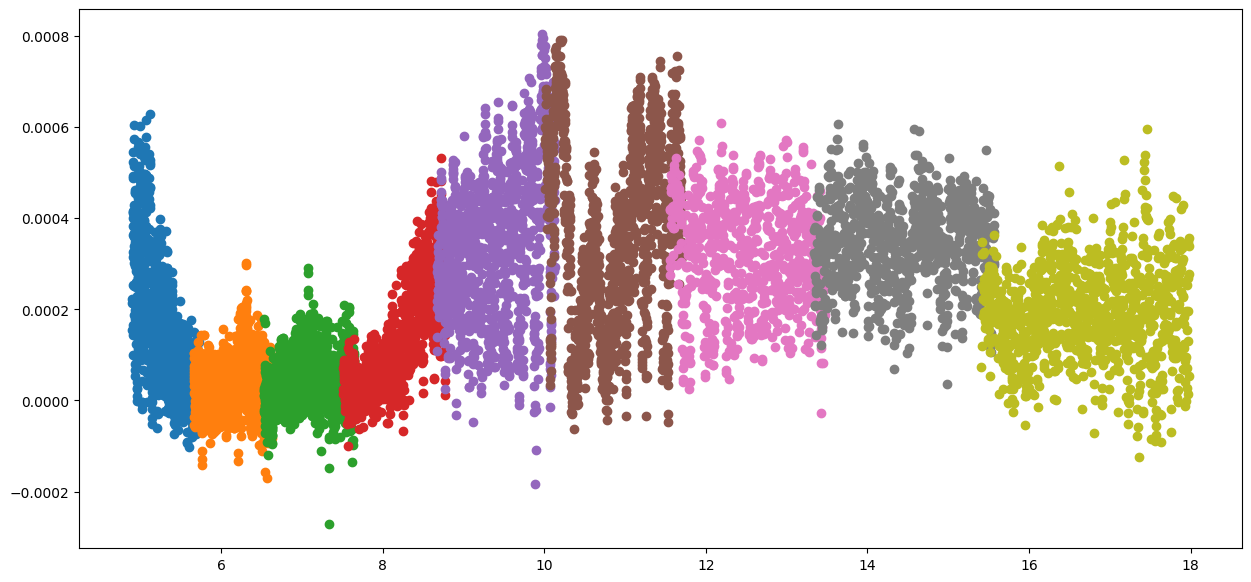

In [6]:
a = np.arange(0, len(spec))

plt.figure(figsize= (15,7))

for ch in ['1A','1B', '1C', '2A', '2B', '2C','3A', '3B', '3C']:
    ind = a[spec['Band'] == ch]
    plt.scatter(spec.iloc[ind, 0], spec.iloc[ind,1])
        
plt.show()

There is channel overlap. Needs to be disentangled and rebinned. 

### HST

In [82]:
path = Path('.') / 'HST/WISEJ1738_HST.txt'

spec= pd.DataFrame()
spec = pd.read_csv(path, header=0, delimiter = ',')

In [83]:
spec

,wavelength[um],flux[cW/m2/nm],error[cW/m2/nm]
0,1.10300,1.328564e-18,3.226870e-19
1,1.10765,9.855751e-19,2.793540e-19
2,1.11230,6.697327e-19,2.489953e-19
3,1.11695,4.162168e-19,2.356254e-19
4,1.12160,2.969137e-19,2.288345e-19
...,...,...,...
124,1.67960,-5.035880e-19,2.463581e-19
125,1.68425,-5.231916e-19,3.207213e-19
126,1.68890,1.903789e-19,4.195772e-19
127,1.69355,2.577735e-19,5.263703e-19


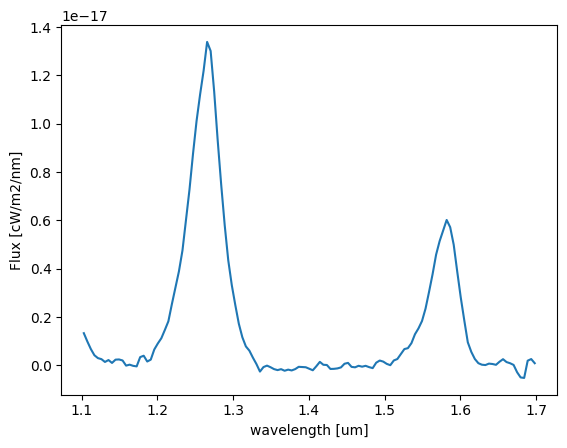

In [5]:
plt.plot(spec.iloc[:,0], spec.iloc[:,1])
plt.ylabel('Flux [cW/m2/nm]')
plt.xlabel('wavelength [um]')
plt.show()

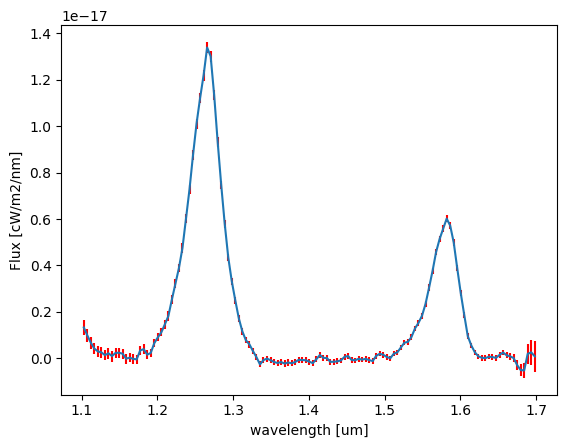

In [6]:
plt.errorbar(spec.iloc[:,0], spec.iloc[:,1], spec.iloc[:,2], ecolor= 'red')
plt.ylabel('Flux [cW/m2/nm]')
plt.xlabel('wavelength [um]')
plt.show()

## Gemini data

In [18]:
path = Path('.') / 'NIRGemini/WISEJ1738_Gemini.txt'

spec= pd.DataFrame()
spec = pd.read_csv(path, header=0, delimiter = '\t')
spec = spec.astype(np.float64)

In [19]:
spec

,wavelength(um),flux(W/m^2/um),error(W/m^2/um)
0,0.99517829,-3.267822e-17,1.244697e-17
1,0.99527096,1.032735e-16,3.081290e-17
2,0.99536364,4.968496e-17,3.176952e-17
3,0.99545631,6.100838e-17,1.845358e-17
4,0.99554898,3.760488e-17,5.982074e-17
...,...,...,...
4068,2.1750755,3.046313e-18,3.819668e-18
4069,2.1752604,2.327817e-18,3.677720e-18
4070,2.1754453,3.525571e-18,3.238720e-18
4071,2.1756302,5.611527e-18,4.674396e-18


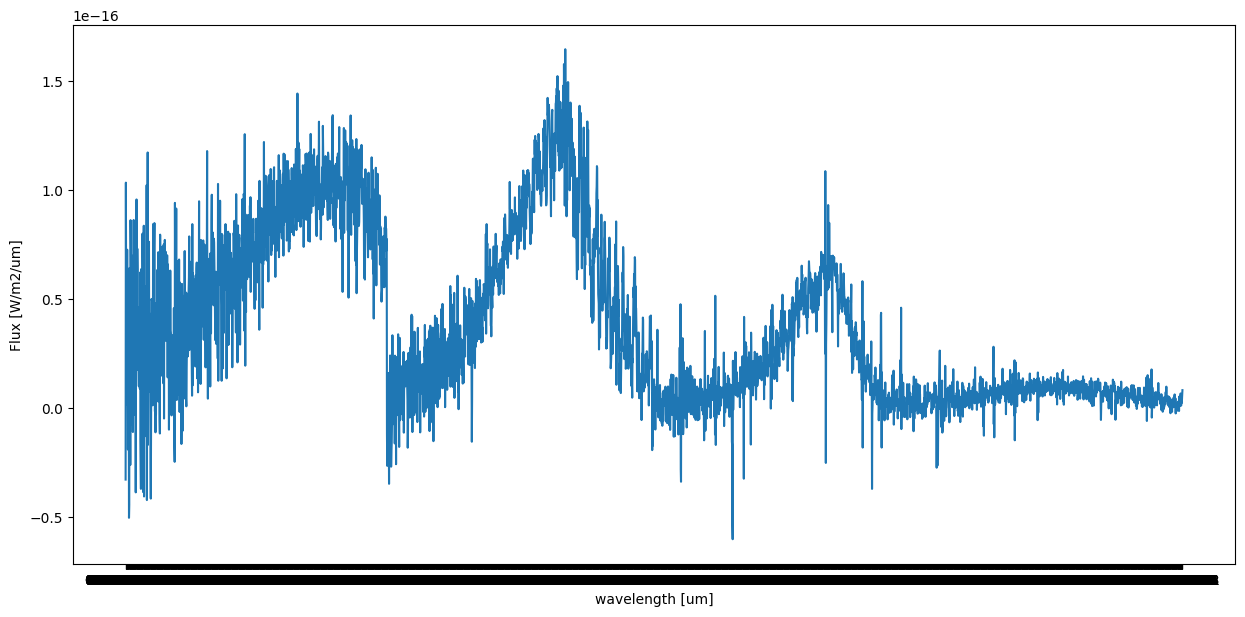

In [24]:
plt.figure(figsize=(15,7))
plt.plot(spec.iloc[:,0], spec.iloc[:,1])
plt.ylabel('Flux [W/m2/um]')
plt.xlabel('wavelength [um]')
plt.show()

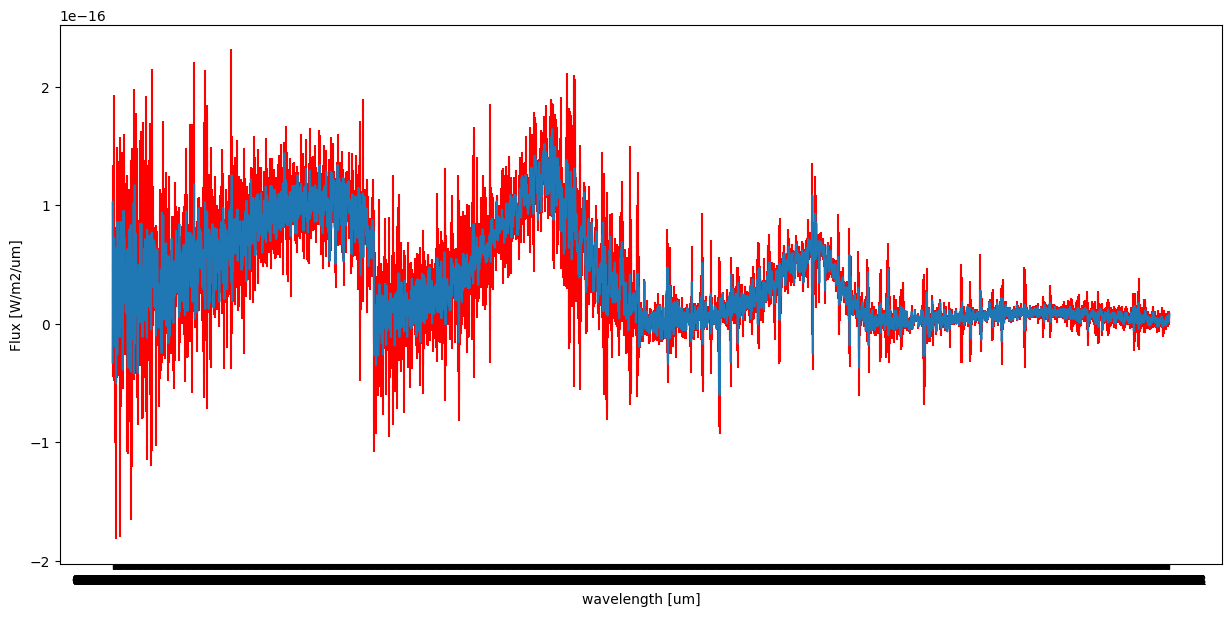

In [23]:
plt.figure(figsize=(15,7))
plt.errorbar(spec.iloc[:,0], spec.iloc[:,1], spec.iloc[:,2], ecolor= 'red')
plt.ylabel('Flux [W/m2/um]')
plt.xlabel('wavelength [um]')
plt.show()

In [4]:
import numpy as np

In [5]:
np.sqrt(10**-10+ 10**-9)

3.3166247903554e-05

In [6]:
3.3166247903554e-05/10**-4

0.33166247903554